<a href="https://colab.research.google.com/github/Nirikshan95/Income-Prediction-on-Adult-Census-Dataset/blob/main/notebooks/Census_Income_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers,models,callbacks
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

## loading datasets

In [ ]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

In [ ]:
train_data=pd.read_csv('/content/adult.data',names=columns)

In [ ]:
test_data=pd.read_csv('/content/adult.test',names=columns)

In [ ]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


## train data exploration

In [ ]:
train_data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
20181,60,Local-gov,232618,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
#information of training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
train_data.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [ ]:
train_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
train_data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


## test data exploration

In [ ]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
#description of train set
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#description of test
test_data.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
test_data.shape

(16282, 15)

In [ ]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
test_data['native-country'].value_counts()

,count
native-country,
United-States,14662
Mexico,308
?,274
Philippines,97
Puerto-Rico,70
Germany,69
Canada,61
India,51
El-Salvador,49


## preprocessing test set

In [ ]:
cate_col=train_data.select_dtypes(include='object').columns
num_col=train_data.select_dtypes(exclude='object').columns

In [ ]:
test_data[test_data.select_dtypes(exclude='object').columns]

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,NaN,NaN,NaN,NaN,NaN
1,226802.0,7.0,0.0,0.0,40.0
2,89814.0,9.0,0.0,0.0,50.0
3,336951.0,12.0,0.0,0.0,40.0
4,160323.0,10.0,7688.0,0.0,40.0
...,...,...,...,...,...
16277,215419.0,13.0,0.0,0.0,36.0
16278,321403.0,9.0,0.0,0.0,40.0
16279,374983.0,13.0,0.0,0.0,50.0
16280,83891.0,13.0,5455.0,0.0,40.0


In [ ]:
#cleans unrelated data
dif_char=[' ?','|1x3 Cross validator']
def clear_unrelated(df):
  df=df.replace(dif_char,np.nan)
  return df

In [ ]:
test_data=clear_unrelated(test_data)

In [ ]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [ ]:
test_data.isnull().sum()

,0
age,1
workclass,964
fnlwgt,1
education,1
education-num,1
marital-status,1
occupation,967
relationship,1
race,1
sex,1


In [ ]:
test_data['age'][0]

nan

In [ ]:
#impute missing values
def impute(df):
  from sklearn.impute import SimpleImputer
  sm1=SimpleImputer(strategy='most_frequent')
  sm1.fit(df[df.select_dtypes(include='object').columns])
  df[df.select_dtypes(include='object').columns]=sm1.transform(df[df.select_dtypes(include='object').columns])

  sm2=SimpleImputer(strategy='mean')
  sm2.fit(df[df.select_dtypes(exclude='object').columns])
  df[df.select_dtypes(exclude='object').columns]=sm2.transform(df[df.select_dtypes(exclude='object').columns])
  return df

In [ ]:
test_data=impute(test_data)

In [ ]:
test_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#checks columns with the improper data type in test set
dif_dtype=[]
def compare_dtype(df):
  print("the following columns having improper dtypes\n")
  for col in train_data.columns:
    if(train_data[col].dtypes!=df[col].dtypes):
      print(col)
      dif_dtype.append(col)

In [ ]:
compare_dtype(test_data)

the following columns having improper dtypes

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


In [ ]:
test_data[dif_dtype].dtypes

,0
age,object
fnlwgt,float64
education-num,float64
capital-gain,float64
capital-loss,float64
hours-per-week,float64


In [ ]:
train_data[dif_dtype].dtypes

,0
age,int64
fnlwgt,int64
education-num,int64
capital-gain,int64
capital-loss,int64
hours-per-week,int64


In [ ]:
#converts the obj,floatr data types to integer
test_data[dif_dtype]=test_data[dif_dtype].astype(int)

In [ ]:
test_data[dif_dtype].dtypes

,0
age,int64
fnlwgt,int64
education-num,int64
capital-gain,int64
capital-loss,int64
hours-per-week,int64


In [ ]:
test_data.income.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [ ]:
test_data['income'] = test_data['income'].str.replace('.', '',)

In [ ]:
#removes the empty spaces in the data
def strip(df):
  for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].str.strip()
  return df

In [ ]:
test_data=strip(test_data)

In [ ]:
test_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,35,Private,189435,HS-grad,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,1081,87,40,United-States,<=50K
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


## combined preprocessing

In [ ]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data=strip(train_data)

In [ ]:
train_data['income']=train_data['income'].apply(lambda x:1 if x=='<=50K' else 0)

In [ ]:
test_data['income']=test_data['income'].apply(lambda x:1 if x=='<=50K' else 0)

In [ ]:
X=train_data.drop('income',axis=1)

In [ ]:
y=train_data['income']

In [ ]:
y.value_counts()

,count
income,
1,24720
0,7841


In [ ]:
#balances the imbalanced dataset
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
def over_sample(X,y):
  ros=RandomOverSampler(random_state=42)
  ros_x,ros_y=ros.fit_resample(X,y)
  return ros_x,ros_y

In [ ]:
train_x,train_y=over_sample(X,y)

In [ ]:
test_x,test_y=test_data.drop(columns='income'),test_data['income']

In [ ]:
train_y.value_counts()

,count
income,
1,24720
0,24720


## function transformations

In [ ]:
df_train_x=train_x.copy()
df_test_x=test_data.drop(columns='income')

In [ ]:
obj_clms=train_x.select_dtypes(include='object').columns
num_clms=train_x.select_dtypes(exclude='object').columns

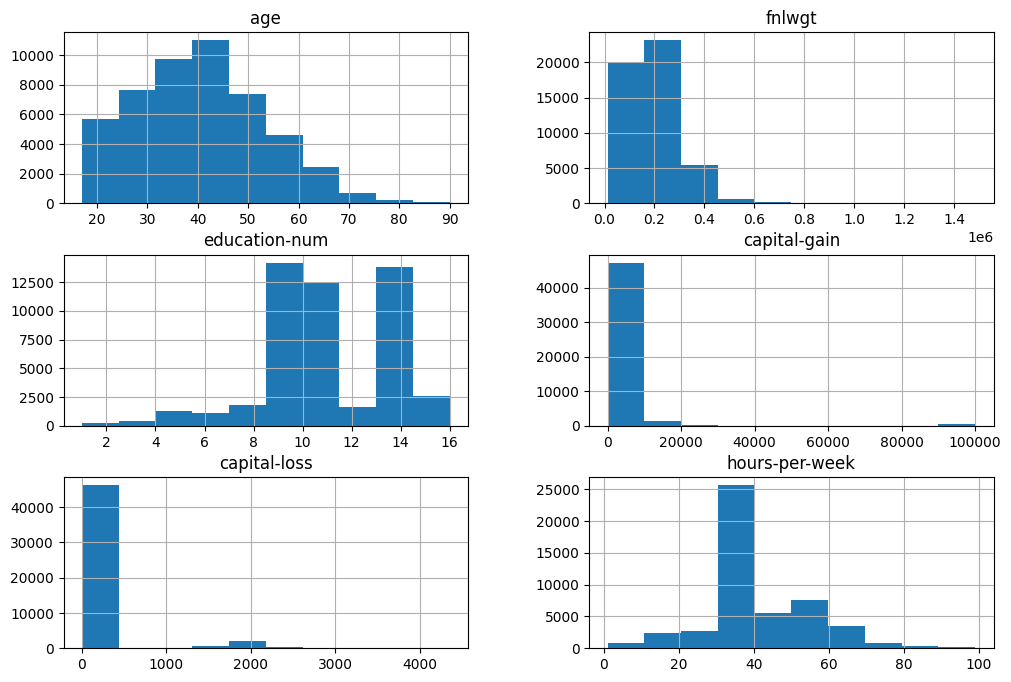

In [ ]:
df_train_x.hist(figsize=(12,8))
plt.show()

In [ ]:
r_skewed=[]
l_skewed=[]
normal=[]
for col in num_clms:
  skewness=df_train_x[col].skew()
  if skewness>0:
    print(col,' is right skewed')
    r_skewed.append(col)
  elif skewness<0:
    print(col,'is left skewed')
    l_skewed.append(col)
  else:
    print(col,'is normal')
    normal.append(col)

age  is right skewed
fnlwgt  is right skewed
education-num is left skewed
capital-gain  is right skewed
capital-loss  is right skewed
hours-per-week  is right skewed


In [ ]:
r_skewed

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [ ]:
l_skewed

['education-num']

In [ ]:
normal

[]

In [ ]:
# suare root transformation
def sr_trans(df,r_skewed_columns):
  df[r_skewed_columns]=np.sqrt(df[r_skewed_columns])
  df[r_skewed_columns].hist(figsize=(10,8))
  plt.title('after the square root transformation')
  plt.show()
  return df

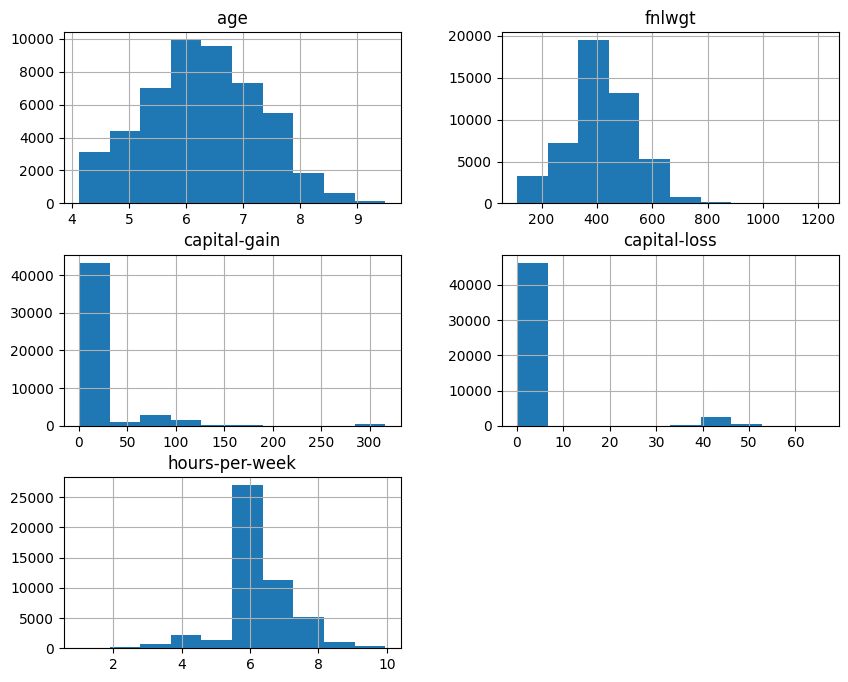

In [ ]:
sr_df_train_x=sr_trans(df_train_x,r_skewed)

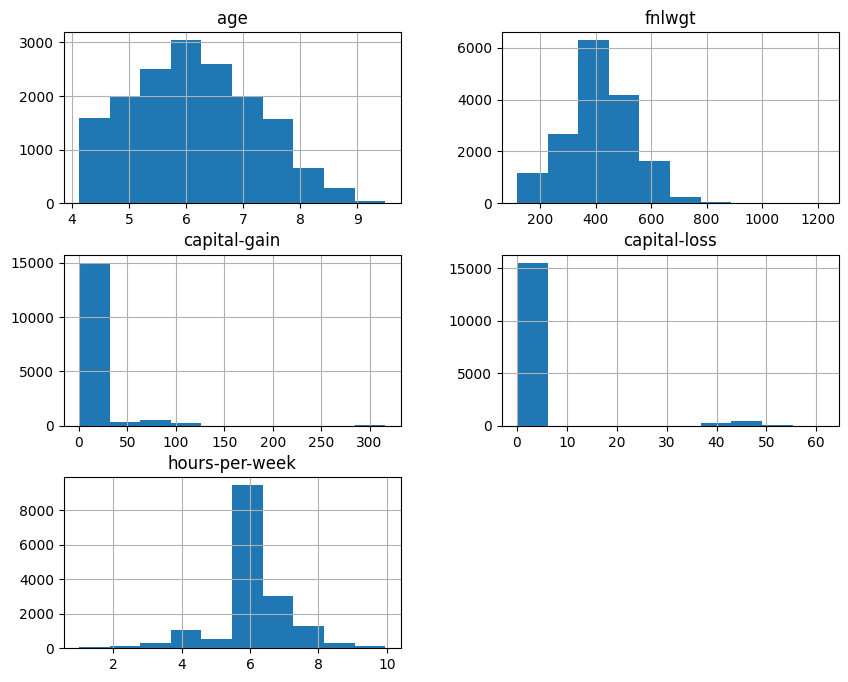

In [ ]:
sr_df_test_x=sr_trans(df_test_x,r_skewed)

In [ ]:
# log transformation
def log_trans(df,r_skewed_columns):
  df[r_skewed_columns]=np.log(df[r_skewed_columns]+1)
  df[r_skewed_columns].hist(figsize=(8,6))
  plt.title(r_skewed_columns)
  plt.show()
  return df

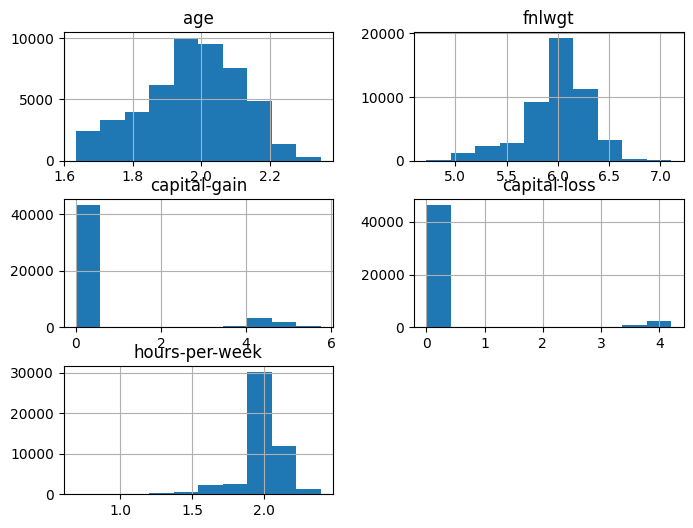

In [ ]:
loged_df_train_x=log_trans(df_train_x,r_skewed)

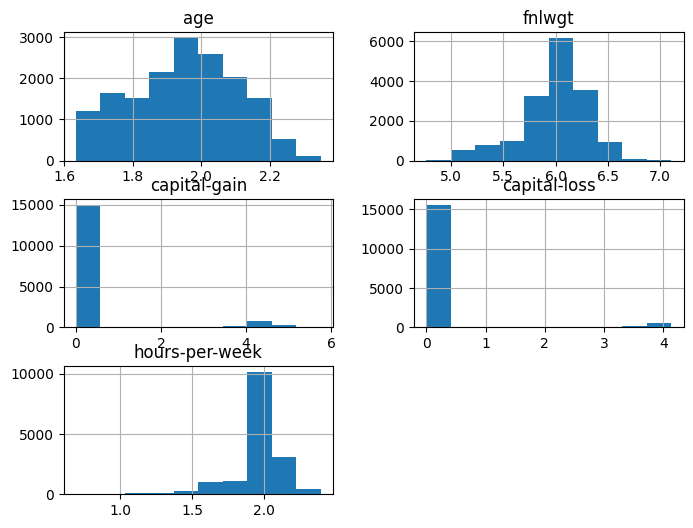

In [ ]:
loged_df_test_x=log_trans(df_test_x,r_skewed)

## ML model pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
train_x.select_dtypes(exclude='object').columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
train_x.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [ ]:
obj_pipe=Pipeline(steps=[
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore')),
    ('scaling',StandardScaler())
])

In [ ]:
num_pipe=Pipeline(steps=[
    ('scaling',StandardScaler())
])

In [ ]:
ct=ColumnTransformer(transformers=[
    ('numeric',num_pipe,num_clms),
    ('categorical',obj_pipe,obj_clms)
],remainder='passthrough')

In [ ]:
def pick_best(X_train,y_train,X_test,y_test):
  df_name=input('enter the type of the dataframe (i.e..original or transformed name) to save the results : ')

  ml_models = [
    ('Naive bayes',BernoulliNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K Neighbors', KNeighborsClassifier())
]
  result=[]
  pipelines={}

  for name,model in ml_models:
    pipeline=Pipeline(steps=[
      ('preprocess',ct),
      ('model',model)
        ]
      )
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    pipelines[name]=pipeline

    #Evaluation
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    print(name,'done')
    result.append([name,accuracy,precision,recall,f1])

  df=pd.DataFrame(result,columns=['model','accuracy','precision','recall','F1 score'])
  df.iloc[:,1:]=df.iloc[:,1:].round(2)
  t1=df['F1 score'].max()
  print('')
  #conditional stmt which returns
  if df[df['F1 score']==t1].shape[0]>1:
    best_model=df.iloc[df['accuracy'].idxmax()]['model']
    print('best model : ',best_model)
    return pipelines[best_model],df.iloc[df['accuracy'].idxmax()]
  else:
    best_model=df.loc[df['F1 score'].idxmax()]['model']
    print('best model : ')
    return pipelines[best_model],df.iloc[df['F1 score'].idxmax()]
  df.to_csv(f'reports/results/ml_models_results_{df_name}.csv',index=False)

In [ ]:
pick_best(train_x,train_y,test_x,test_y)

enter the type of the dataframe (i.e..original or transformed name) to save the results : original
Naive bayes done
Logistic Regression done
Random Forest done
Decision Tree done
K Neighbors done

best model : 


(Pipeline(steps=[('preprocess',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('numeric',
                                                   Pipeline(steps=[('scaling',
                                                                    StandardScaler())]),
                                                   Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object')),
                                                  ('categorical',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                  sparse_output=False)),
                                                                   ('scaling',
                                                                    S

In [ ]:
best_ml_model,result_mdl_perf=pick_best(train_x,train_y,test_x,test_y)

enter the type of the dataframe (i.e..original or transformed name) to save the results : original
Naive bayes done
Logistic Regression done
Random Forest done
Decision Tree done
K Neighbors done

best model : 


In [ ]:
result_mdl_perf

,2
model,Random Forest
accuracy,0.84
precision,0.9
recall,0.89
F1 score,0.89


In [ ]:
best_ml_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

## NN model training

In [ ]:
train_y.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
train_x.shape

(49440, 14)

In [ ]:
x_train=ct.fit_transform(train_x)
x_test=ct.transform(test_x)

In [ ]:
x_train.shape

(49440, 108)

In [ ]:
model=models.Sequential([
    layers.Dense(256,input_dim=108,activation='relu'),
    layers.Dense(156,activation='relu'),
    layers.Dense(1,activation='sigmoid')
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callback=callbacks.EarlyStopping(monitor='val_loss',min_delta=0.05,patience=10,verbose=1,mode='auto')

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
history=model.fit(x_train,train_y.values,validation_data=[x_test,test_y.values],epochs=30,batch_size=500,callbacks=callback)

Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7580 - loss: 0.4814 - val_accuracy: 0.8068 - val_loss: 0.3901
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8294 - loss: 0.3677 - val_accuracy: 0.7968 - val_loss: 0.4057
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8362 - loss: 0.3518 - val_accuracy: 0.8172 - val_loss: 0.3751
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8488 - loss: 0.3346 - val_accuracy: 0.7983 - val_loss: 0.4135
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8524 - loss: 0.3234 - val_accuracy: 0.8013 - val_loss: 0.4079
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8580 - loss: 0.3173 - val_accuracy: 0.7960 - val_loss: 0.4192
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8605 - loss: 0.3095 - val_accuracy: 0.8107 - val_loss: 0.3887
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8645 - loss: 0.3039 - val_accuracy: 0.8145 - val_loss

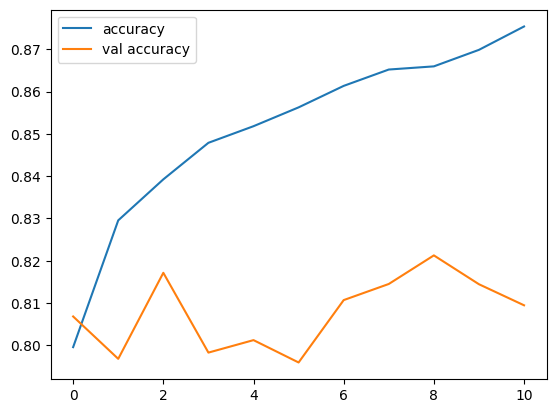

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val accuracy'])
plt.show()

In [ ]:
model.evaluate(x_test,test_y.values)

509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8096 - loss: 0.4049


[0.40531855821609497, 0.8094828724861145]